<a href="https://colab.research.google.com/github/mehulraj19/VerzeoMajorProject/blob/main/Verzeo_Mini_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mehul Raj
email: mehulraj1995@gmail.com

<center>
    <b>
        <h1>Verzeo Mini Project</h1>
    </b>
</center>

## Importing Packages

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

## Importing dataset

In [9]:
df = pd.read_csv("airline_passengers1.csv")
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Data Analysis

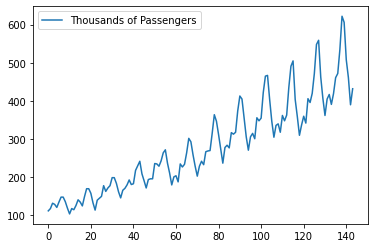

In [10]:
df.plot()

## Data Pre-Processing

In [11]:
# prepare the Column name
df.columns = ['ds', 'y']

In [12]:
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [14]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Modelling

In [15]:
from fbprophet import Prophet

In [26]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)

In [27]:
model.fit(df)

In [28]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


## Model Prediction

In [37]:
future = list()
for i in range(1, 10):
  date = '1960-%02d' %i
  future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [30]:
f = model.predict(future)

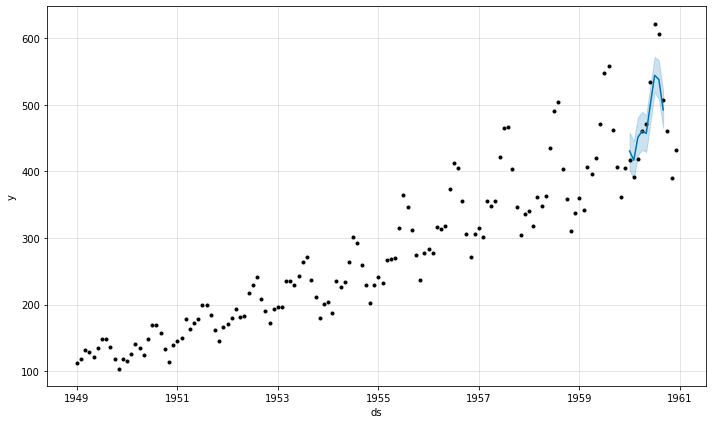

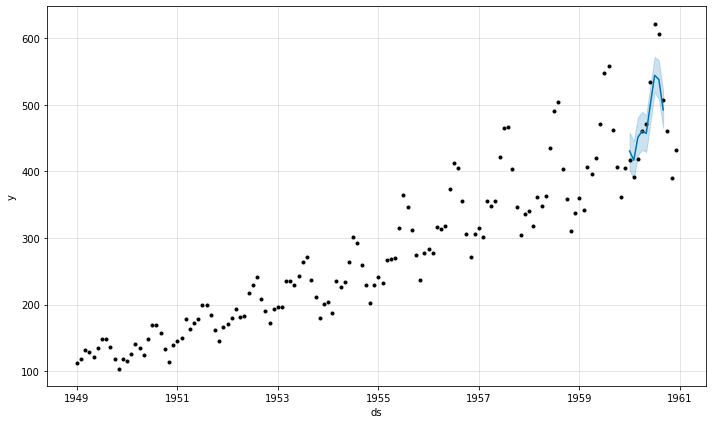

In [31]:
model.plot(f)

In [32]:
print(f[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds        yhat  yhat_lower  yhat_upper
0 1960-01-01  430.772741  401.892072  458.432948
1 1960-02-01  416.922922  388.424575  445.564882
2 1960-03-01  451.203049  424.587741  481.389568
3 1960-04-01  460.476670  432.387572  489.655744
4 1960-05-01  457.230731  429.311954  483.966383
5 1960-06-01  501.985433  474.115381  530.630545
6 1960-07-01  544.395851  519.407567  572.195787
7 1960-08-01  538.071268  508.379620  566.899184
8 1960-09-01  492.523288  465.302830  520.138908


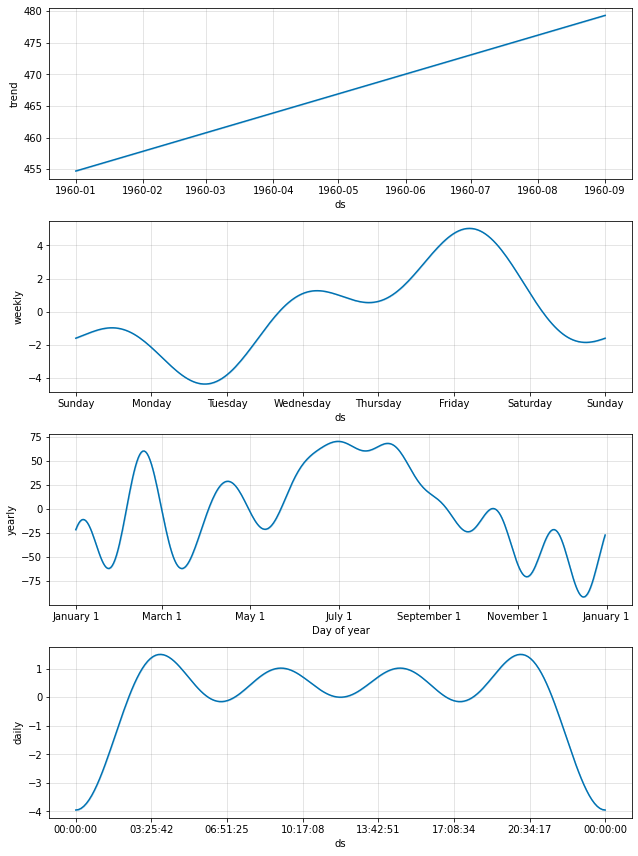

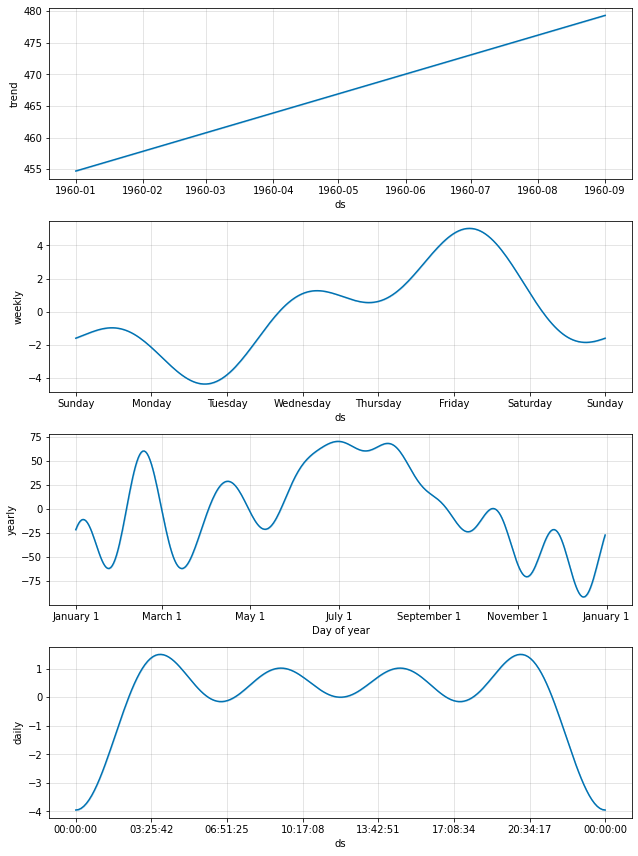

In [34]:
model.plot_components(f)

In [33]:
f

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,454.719385,401.892072,458.432948,454.719385,454.719385,-23.946644,-23.946644,-23.946644,-3.950032,-3.950032,-3.950032,4.728860,4.728860,4.728860,-24.725472,-24.725472,-24.725472,0.0,0.0,0.0,430.772741
1,1960-02-01,457.843113,388.424575,445.564882,457.843113,457.843113,-40.920191,-40.920191,-40.920191,-3.950032,-3.950032,-3.950032,-2.167974,-2.167974,-2.167974,-34.802185,-34.802185,-34.802185,0.0,0.0,0.0,416.922922
2,1960-03-01,460.765310,424.587741,481.389568,460.765310,460.765310,-9.562261,-9.562261,-9.562261,-3.950032,-3.950032,-3.950032,-3.819109,-3.819109,-3.819109,-1.793120,-1.793120,-1.793120,0.0,0.0,0.0,451.203049
3,1960-04-01,463.889038,432.387572,489.655744,463.889038,463.889038,-3.412368,-3.412368,-3.412368,-3.950032,-3.950032,-3.950032,4.728860,4.728860,4.728860,-4.191196,-4.191196,-4.191196,0.0,0.0,0.0,460.476670
4,1960-05-01,466.912001,429.311954,483.966383,466.912001,466.912001,-9.681270,-9.681270,-9.681270,-3.950032,-3.950032,-3.950032,-1.608789,-1.608789,-1.608789,-4.122450,-4.122450,-4.122450,0.0,0.0,0.0,457.230731
5,1960-06-01,470.035729,474.115381,530.630545,470.035729,470.035729,31.949704,31.949704,31.949704,-3.950032,-3.950032,-3.950032,1.090274,1.090274,1.090274,34.809461,34.809461,34.809461,0.0,0.0,0.0,501.985433
6,1960-07-01,473.058692,519.407567,572.195787,473.058692,473.058692,71.337159,71.337159,71.337159,-3.950032,-3.950032,-3.950032,4.728860,4.728860,4.728860,70.558331,70.558331,70.558331,0.0,0.0,0.0,544.395851
7,1960-08-01,476.182420,508.379620,566.899184,476.182420,476.182420,61.888849,61.888849,61.888849,-3.950032,-3.950032,-3.950032,-2.167974,-2.167974,-2.167974,68.006855,68.006855,68.006855,0.0,0.0,0.0,538.071268
8,1960-09-01,479.306148,465.302830,520.138908,479.306148,479.306148,13.217141,13.217141,13.217141,-3.950032,-3.950032,-3.950032,0.617686,0.617686,0.617686,16.549486,16.549486,16.549486,0.0,0.0,0.0,492.523288
